In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
## dropping species column
df.drop('species', axis=1, inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


KMEANS CLUSTERING
KMeans is an unsupervised learning algorithm that partitions the dataset into K clusters by minimizing the distance between points and their cluster centroid.It is suitable for Iris because the data is numerical and naturally tends to form groups (species).

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df)

# Visualize clusters using PCA for 2D projection
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df.drop('kmeans_cluster', axis=1)), columns=['PC1', 'PC2'])
df_pca['cluster'] = df['kmeans_cluster']



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


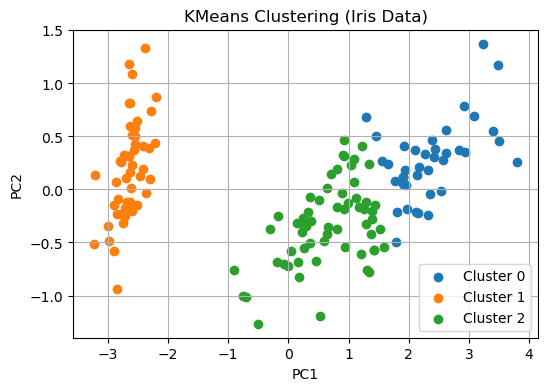

In [11]:
# Plotting
plt.figure(figsize=(6, 4))
for i in range(3):
    plt.scatter(df_pca[df_pca.cluster == i]['PC1'], df_pca[df_pca.cluster == i]['PC2'], label=f'Cluster {i}')
plt.title("KMeans Clustering (Iris Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

Hierarchical Clustering
Hierarchical Clustering builds nested clusters by either merging or splitting clusters successively.It’s suitable for the Iris dataset as it can help uncover a natural hierarchy or grouping among species.

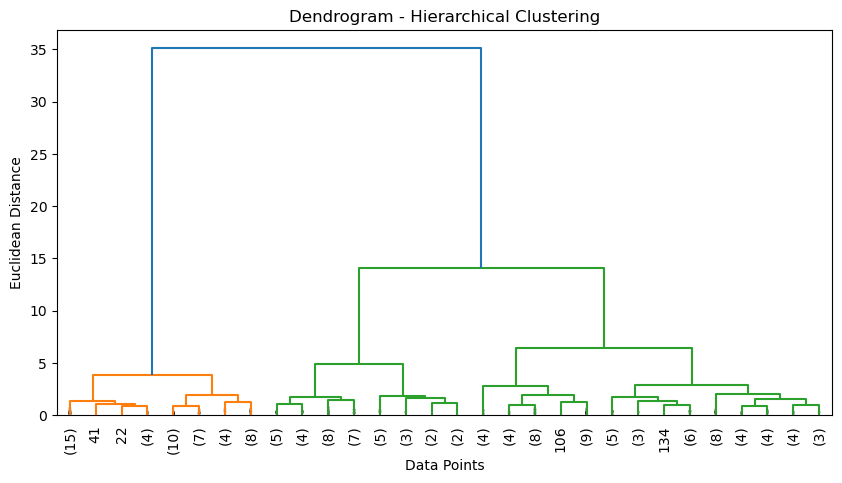

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns

# Apply Hierarchical clustering
linked = linkage(df.drop('kmeans_cluster', axis=1), method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Assign clusters from hierarchical
df['hier_cluster'] = fcluster(linked, 3, criterion='maxclust')

# Visualize clusters using PCA
df_pca['hier_cluster'] = df['hier_cluster']



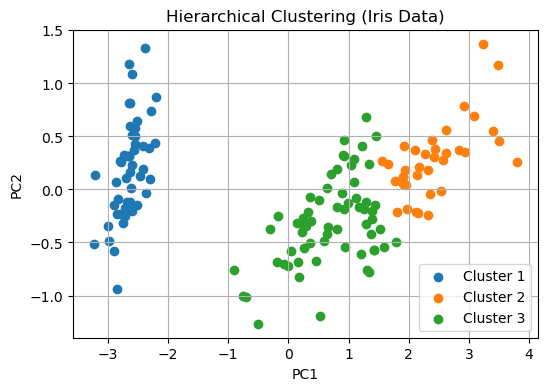

In [17]:
plt.figure(figsize=(6, 4))
for i in range(1, 4):  # cluster labels start from 1
    plt.scatter(df_pca[df_pca.hier_cluster == i]['PC1'], df_pca[df_pca.hier_cluster == i]['PC2'], label=f'Cluster {i}')
plt.title("Hierarchical Clustering (Iris Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()
